<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Support Vector Machines (SVM) - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("bikeshare.csv")

In [4]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


## Data preprocessing 

In [5]:
df.isna().sum()  

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


We need to change the type of categorical variables first, 

In [7]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'cnt'],
      dtype='object')

In [8]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [9]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday','weathersit',]

for col in categorical: 
    df[col] = df[col].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   notbizday   17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  object  
 12  cnt         17379 non-null  int64   
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 817.0+ KB


In [11]:
df.drop('dteday',axis=1, inplace=True)

In [12]:
df.columns.difference(categorical)

Index(['cnt', 'hum', 'temp', 'windspeed'], dtype='object')

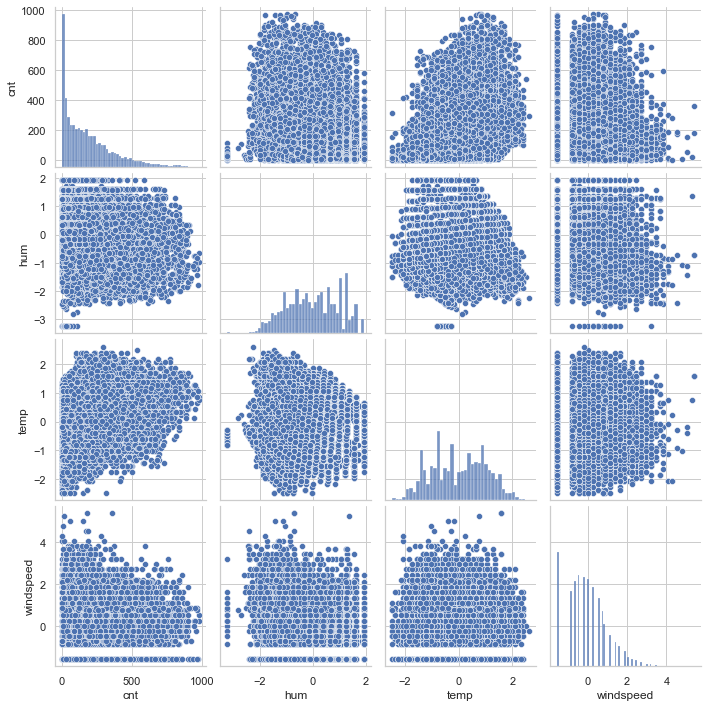

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)])

## Scaling the features: 

Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the **distance** between observations. 

for this data set we are going to use standardization as our scaling strategy. 


In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [16]:
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334609,0.947345,-1.553844,16,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-1.438475,0.895513,-1.553844,40,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,-1.438475,0.895513,-1.553844,32,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,-1.334609,0.636351,-1.553844,13,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-1.334609,0.636351,-1.553844,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [19]:
df_sc.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,-0.956339,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
1,-1.438516,0.895539,-1.553889,-0.824022,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
2,-1.438516,0.895539,-1.553889,-0.868128,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
3,-1.334648,0.636370,-1.553889,-0.972879,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
4,-1.334648,0.636370,-1.553889,-1.039037,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314


### Defining the variables and splitting the data

In [21]:
y = df_sc['cnt'] #target variable
X = df_sc.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)#30 percent test set

---

###  SVM Regression with Sklearn

In [22]:
from sklearn.svm import SVR

In [23]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [24]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [25]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,-0.901207,-0.947701
4418,-0.785430,-0.798810
7141,-0.983905,-1.078712
14765,0.085658,0.105907
16541,-0.686192,-0.678443


### Evaluating the model on test dataset¶

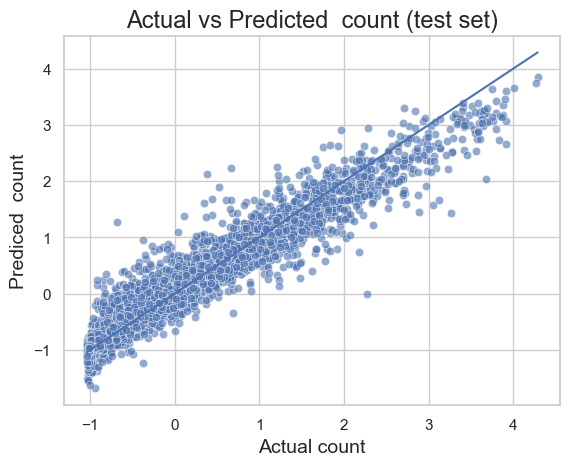

In [29]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

In [30]:
SVM_regression.score(X_test, y_test)

0.9314701410731606

In [31]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.26

**Exercise**: 

Try C=0.00001. What do you expect to observe?

---

## Tuning hyperparameters: 
### Gridsearch
Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a **Gridsearch**, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

1. **C** represents **cost** of misclassification. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

2. **gamma** is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’. 
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [34]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [ ]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  44.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  49.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  59.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  47.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 1.0min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  19.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  19.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  22.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  10.6s
[CV] END ........................C=1, gamma=0.01,

What **fit** does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [48]:
y_hat_optimized = grid.predict(X_test)

In [49]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4495,-0.901207,-0.947701,-0.927833
4418,-0.785430,-0.798810,-0.794302
7141,-0.983905,-1.078712,-1.105306
14765,0.085658,0.105907,0.075366
16541,-0.686192,-0.678443,-0.773309


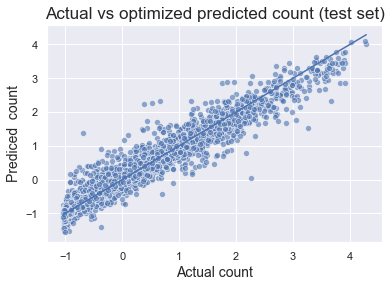

In [50]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [51]:
grid.score(X_test, y_test)

0.942664358185939

In [52]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.24

---

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [56]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.261

---

#### Additional links

1. SKlearn documentation : https://scikit-learn.org/stable/modules/svm.html
2. SVR examples: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
3. SVR intuition: https://www.saedsayad.com/support_vector_machine_reg.htm
4. Convex Optimization : https://www.amazon.com/dp/0521833787/?coliid=I1FTQ8R03FUUQK&colid=VIHSBPX6N52B&psc=1&ref_=lv_ov_lig_dp_it
5. GridsearchCV documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html